In [ ]:
# this script originally come from myeloid_fig
# this script plot proportion stacked bar charts

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scanpy as sc
import numpy as np
import pandas as pd
from matplotlib.pyplot import rc_context
pd.set_option('display.max_rows', 200)
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
#sc.logging.print_versions() #print version of package
sc.logging.print_header()
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=120, color_map='viridis')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.4 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.3 statsmodels==0.13.5 python-igraph==0.10.2 pynndescent==0.5.8


In [2]:
adata_gex=sc.read('/home/jovyan/data/covid_19_renal/renal_covid_19_gex.h5ad')

In [3]:
tcell= pd.read_csv('/nfs/team205/ld21/renal/T_NK_compartment_annotation_updated.csv', index_col=0)

In [4]:
mcell = pd.read_csv('/nfs/team298/wt1/win/for_lisa/myeloid_progen_for_Lisa.csv', index_col=0)

In [5]:
bcell = pd.read_csv('/nfs/team298/wt1/win/for_lisa/imperial_renal_B_updated_annotations_230622.csv', index_col=0)

In [6]:
bcell.celltype_B_corrected_group.unique()

array(['B', 'B_ASC'], dtype=object)

In [7]:
len(tcell.index)+len(bcell.index)+len(mcell.index)

764381

In [8]:
adata = adata_gex[(adata_gex.obs.index.isin(tcell.index))|(adata_gex.obs.index.isin(bcell.index))|(adata_gex.obs.index.isin(mcell.index))]

In [9]:
adata

View of AnnData object with n_obs × n_vars = 764381 × 33559
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ADT', 'nFeature_ADT', 'nCount_ADT_raw', 'nFeature_ADT_raw', 'nCount_RNA_raw', 'nFeature_RNA_raw', 'soupxOnAdt', 'soupxOnRna', 'percentMito', 'exclude', 'centre', 'pool', 'tcrId', 'bcrId', 'celltypist_broad_predLabel', 'celltypist_broad_maxPredProb', 'haniffa_broad_predLabel', 'haniffa_broad_maxPredProb', 'yoshida_broad_predLabel', 'yoshida_broad_maxPredProb', 'celltypist_detailed_predLabel', 'celltypist_detailed_maxPredProb', 'yoshida_detailed_predLabel', 'yoshida_detailed_maxPredProb', 'seurat_clusters', 'RNA_sequencing_saturation', 'pool_factor', 'RNA_readsConfidentlyOnTranscriptome', 'RNA_readsConfidentlyOnGenome', 'RNA_readsOnGenome', 'RNA_Q30readsBarcode', 'RNA_Q30readsRead', 'RNA_Q30readsUmi', 'rna_snn_res.4', 'rna_snn_res.0.5', 'rna_snn_res.0.1', 'harmony_snn_res.4', 'yoshida_broad_predLabel_majorVote', 'harmony_snn_res.0.5', 'harmony_snn_res.0.1', 'cell_type_

In [10]:
adata.obs['final_anno']='uk'
adata.obs['final_anno']=adata.obs['final_anno'].astype('object')

/tmp/ipykernel_10258/501034239.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['final_anno']='uk'


In [11]:
bcell.head()

,celltype_B_corrected_group,celltype_B_corrected,celltype_B_corrected_IFN
UK-CIC10689738+UK-CIC10690026_AAACCTGAGCGACGTA-1,B,B_switched_mem,B_switched_mem_Low
UK-CIC10689738+UK-CIC10690026_AACACGTGTTGGTGGA-1,B,B_ASC_dividing,B_ASC_dividing_Low
UK-CIC10689738+UK-CIC10690026_AACCATGCAGTCACTA-1,B,B_switched_mem,B_switched_mem_Low
UK-CIC10689738+UK-CIC10690026_AACCGCGAGTCTCCTC-1,B,B_switched_mem,B_switched_mem_Low
UK-CIC10689738+UK-CIC10690026_AACCGCGGTCCAACTA-1,B,B_ASC_dividing,B_ASC_dividing_Low


In [12]:
adata.obs['final_anno'].update(pd.Series(tcell['level_2'].astype('object')))

In [13]:
adata.obs['final_anno'].update(pd.Series(bcell['celltype_B_corrected'].astype('object')))

In [14]:
adata.obs['final_anno'].update(pd.Series(mcell['annot4'].astype('object')))

In [15]:
list(adata.obs['final_anno'].unique())

['B_switched_mem',
 'CD14mono_activated',
 'T reg',
 'T CD4 Naive',
 'CD16mono',
 'pDC',
 'T CD4 Helper',
 'NK',
 'doublets',
 'T CD8 CTL',
 'CD14mono',
 'Int.mono',
 'T CD4 CTL',
 'CD16mono_C1',
 'NK CD56 bright',
 'CD16mono_IFN',
 'T CD8 Mem',
 'CD14mono_IFN',
 'RBC',
 'B_ASC_dividing',
 'NKT',
 'T CD4 cycling',
 'T CD8 Naive',
 'DC2',
 'MAIT',
 'T g/d',
 'B_naive',
 'B_ASC_IgA',
 'Platelet',
 'CD14mono_anti_inflammatory',
 'HSPC',
 'B_ASC_IgM',
 'B_non-switched_mem',
 'DC3',
 'B_ASC_IgG',
 'T CD8 EMRA',
 'DC1',
 'B_CD11c',
 'DC3_IFN',
 'ILC',
 'ASDC',
 'B_ASC_other']

In [16]:
adata.obs['final_anno'] = adata.obs['final_anno'].str.replace('CD14mono_activated','CD14mono')


In [17]:
adata.obs['final_anno'] = adata.obs['final_anno'].str.replace('CD14mono_anti_inflammatory','CD14mono_alt_act')

In [18]:
list(adata.obs['final_anno'].unique())

['B_switched_mem',
 'CD14mono',
 'T reg',
 'T CD4 Naive',
 'CD16mono',
 'pDC',
 'T CD4 Helper',
 'NK',
 'doublets',
 'T CD8 CTL',
 'Int.mono',
 'T CD4 CTL',
 'CD16mono_C1',
 'NK CD56 bright',
 'CD16mono_IFN',
 'T CD8 Mem',
 'CD14mono_IFN',
 'RBC',
 'B_ASC_dividing',
 'NKT',
 'T CD4 cycling',
 'T CD8 Naive',
 'DC2',
 'MAIT',
 'T g/d',
 'B_naive',
 'B_ASC_IgA',
 'Platelet',
 'CD14mono_alt_act',
 'HSPC',
 'B_ASC_IgM',
 'B_non-switched_mem',
 'DC3',
 'B_ASC_IgG',
 'T CD8 EMRA',
 'DC1',
 'B_CD11c',
 'DC3_IFN',
 'ILC',
 'ASDC',
 'B_ASC_other']

In [19]:
adata=adata[~adata.obs['final_anno'].isin(['doublets'])]

In [20]:
list(adata.obs['final_anno'].unique())

['B_switched_mem',
 'CD14mono',
 'T reg',
 'T CD4 Naive',
 'CD16mono',
 'pDC',
 'T CD4 Helper',
 'NK',
 'T CD8 CTL',
 'Int.mono',
 'T CD4 CTL',
 'CD16mono_C1',
 'NK CD56 bright',
 'CD16mono_IFN',
 'T CD8 Mem',
 'CD14mono_IFN',
 'RBC',
 'B_ASC_dividing',
 'NKT',
 'T CD4 cycling',
 'T CD8 Naive',
 'DC2',
 'MAIT',
 'T g/d',
 'B_naive',
 'B_ASC_IgA',
 'Platelet',
 'CD14mono_alt_act',
 'HSPC',
 'B_ASC_IgM',
 'B_non-switched_mem',
 'DC3',
 'B_ASC_IgG',
 'T CD8 EMRA',
 'DC1',
 'B_CD11c',
 'DC3_IFN',
 'ILC',
 'ASDC',
 'B_ASC_other']

In [21]:
adata.obs['centre'].unique()

['NCL', 'Cambridge']
Categories (2, object): ['Cambridge', 'NCL']

In [22]:
adata.obs['case_control'].unique()

['NA', 'NEGATIVE', 'POSITIVE', 'RECOVERY']
Categories (4, object): ['NA', 'NEGATIVE', 'POSITIVE', 'RECOVERY']

In [23]:
#adata = adata[adata.obs['case_control']!='NA']
adata = adata[~adata.obs['case_control'].isin(['NA','RECOVERY'])]

In [24]:
adata.obs['case_control'].unique()

['NEGATIVE', 'POSITIVE']
Categories (2, object): ['NEGATIVE', 'POSITIVE']

In [25]:
adata.obs['centre'].unique()

['NCL', 'Cambridge']
Categories (2, object): ['Cambridge', 'NCL']

In [26]:
adata.obs['WHO_severity'].unique()
#'NA' is negative here

['NA', 'critical', 'severe', 'moderate', 'mild']
Categories (5, object): ['NA', 'critical', 'mild', 'moderate', 'severe']

In [27]:
'C139' in list(adata.obs['patient_id'].unique())

True

In [28]:
'C116' in list(adata.obs['patient_id'].unique())

True

In [29]:
'C141' in list(adata.obs['patient_id'].unique())

True

In [30]:
#remove C139 and C116 completely
adata = adata[~adata.obs['patient_id'].isin(['C139','C116'])]

In [31]:
'C139' in list(adata.obs['patient_id'].unique())

False

In [32]:
'C116' in list(adata.obs['patient_id'].unique())

False

In [33]:
'C141' in list(adata.obs['patient_id'].unique())

True

# plotting compositional

In [34]:
adata.obs['cell_type_compartment'].unique()

['Myeloid', 'T/NK', 'B/Plasma/Cycling']
Categories (3, object): ['B/Plasma/Cycling', 'Myeloid', 'T/NK']

In [35]:
adata_T = adata[adata.obs['cell_type_compartment']=='T/NK']

In [36]:
adata_T.obs['cell_type_compartment'].unique()

['T/NK']
Categories (1, object): ['T/NK']

In [37]:
list(adata_T.obs['final_anno'].unique())

['T reg',
 'T CD4 Naive',
 'NK',
 'T CD4 Helper',
 'T CD8 CTL',
 'T CD4 CTL',
 'NK CD56 bright',
 'T CD8 Naive',
 'MAIT',
 'T g/d',
 'NKT',
 'T CD8 Mem',
 'T CD4 cycling',
 'T CD8 EMRA',
 'ILC']

In [38]:
adata_M = adata[adata.obs['cell_type_compartment']=='Myeloid']

In [39]:
list(adata_M.obs['final_anno'].unique())

['CD14mono',
 'CD16mono',
 'pDC',
 'Int.mono',
 'CD16mono_IFN',
 'CD14mono_IFN',
 'RBC',
 'CD16mono_C1',
 'DC2',
 'Platelet',
 'CD14mono_alt_act',
 'HSPC',
 'DC3',
 'DC1',
 'DC3_IFN',
 'ASDC']

In [40]:
list(adata_M.obs['cell_type_compartment'].unique())

['Myeloid']

In [41]:
adata_B = adata[adata.obs['cell_type_compartment']=='B/Plasma/Cycling']

In [42]:
list(adata_B.obs['cell_type_compartment'].unique())

['B/Plasma/Cycling']

In [43]:
list(adata_B.obs['final_anno'].unique())

['B_ASC_dividing',
 'B_switched_mem',
 'B_naive',
 'B_ASC_IgA',
 'B_ASC_IgM',
 'B_non-switched_mem',
 'B_ASC_IgG',
 'B_CD11c',
 'B_ASC_other']

# different severity

In [44]:
adata_M.obs['centre'].unique()

['NCL', 'Cambridge']
Categories (2, object): ['Cambridge', 'NCL']

In [45]:
adata_M.obs['case_control'].unique()

['NEGATIVE', 'POSITIVE']
Categories (2, object): ['NEGATIVE', 'POSITIVE']

In [46]:
adata_M.obs['WHO_severity'].unique()
#'NA' is negative as 'RECOVERY' is not included

['NA', 'severe', 'critical', 'moderate', 'mild']
Categories (5, object): ['NA', 'critical', 'mild', 'moderate', 'severe']

In [47]:
adata_M_negative = adata_M[adata_M.obs['WHO_severity']=='NA']
adata_M_mild_mod = adata_M[adata_M.obs['WHO_severity'].isin(['mild','moderate'])]
adata_M_sev_critical = adata_M[adata_M.obs['WHO_severity'].isin(['severe','critical'])]

In [48]:
adata_M_sev_critical.n_obs


25593

In [49]:
adata_M.obs['WHO_severity'].value_counts()

NA          34658
mild        33936
moderate    15860
severe      14173
critical    11420
Name: WHO_severity, dtype: int64

In [50]:
adata_T_negative = adata_T[adata_T.obs['WHO_severity']=='NA']
adata_T_mild_mod = adata_T[adata_T.obs['WHO_severity'].isin(['mild','moderate'])]
adata_T_sev_critical = adata_T[adata_T.obs['WHO_severity'].isin(['severe','critical'])]

In [51]:
adata_T_negative.n_obs

114527

In [52]:
adata_T.obs['WHO_severity'].value_counts()

NA          114527
mild         96679
moderate     80898
severe       53554
critical     35397
Name: WHO_severity, dtype: int64

In [53]:
adata_B_negative = adata_B[adata_B.obs['WHO_severity']=='NA']
adata_B_mild_mod = adata_B[adata_B.obs['WHO_severity'].isin(['mild','moderate'])]
adata_B_sev_critical = adata_B[adata_B.obs['WHO_severity'].isin(['severe','critical'])]

In [54]:
adata_B_sev_critical.n_obs

16891

In [55]:
adata_B.obs['WHO_severity'].value_counts()

mild        19933
severe      10300
NA          10120
moderate    10012
critical     6591
Name: WHO_severity, dtype: int64

In [56]:
df_T_negative=pd.crosstab(adata_T_negative.obs['sample_id'],adata_T_negative.obs['final_anno']).apply(lambda r: r/r.sum(),axis=1)
df_T_negative.head()

final_anno,ILC,MAIT,NK,NK CD56 bright,NKT,T CD4 CTL,T CD4 Helper,T CD4 Naive,T CD4 cycling,T CD8 CTL,T CD8 EMRA,T CD8 Mem,T CD8 Naive,T g/d,T reg
sample_id,,,,,,,,,,,,,,,
C58_160420,0.004082,0.000000,0.191837,0.032653,0.040816,0.224490,0.122449,0.016327,0.000000,0.273469,0.000000,0.085714,0.008163,0.000000,0.000000
C69_1804,0.000330,0.007270,0.050231,0.006279,0.002809,0.081791,0.324025,0.175479,0.000000,0.252974,0.000000,0.044944,0.013880,0.005453,0.034534
C85_2004,0.000732,0.003659,0.158068,0.013172,0.000732,0.000366,0.390048,0.227223,0.000366,0.027076,0.000000,0.084888,0.072082,0.003293,0.018295
C103_2204,0.000363,0.014882,0.182940,0.020508,0.049365,0.046279,0.292196,0.102904,0.002904,0.151361,0.000907,0.042650,0.020871,0.029038,0.042831
C104_2204,0.000369,0.001659,0.360251,0.035398,0.002397,0.122050,0.159292,0.054941,0.001106,0.167957,0.000000,0.059181,0.011246,0.002028,0.022124


In [57]:
df_T_mild_mod=pd.crosstab(adata_T_mild_mod.obs['sample_id'],adata_T_mild_mod.obs['final_anno']).apply(lambda r: r/r.sum(),axis=1)
df_T_mild_mod.head()

final_anno,ILC,MAIT,NK,NK CD56 bright,NKT,T CD4 CTL,T CD4 Helper,T CD4 Naive,T CD4 cycling,T CD8 CTL,T CD8 EMRA,T CD8 Mem,T CD8 Naive,T g/d,T reg
sample_id,,,,,,,,,,,,,,,
C23_1004,0.000913,0.027397,0.107763,0.014612,0.008219,0.012785,0.222831,0.315068,0.000913,0.118721,0.000000,0.026484,0.081279,0.026484,0.036530
C23_1504,0.000000,0.025281,0.136236,0.015449,0.001404,0.035112,0.216292,0.292135,0.004213,0.144663,0.000000,0.015449,0.050562,0.035112,0.028090
C23_2204,0.000000,0.036091,0.115572,0.032036,0.007299,0.030819,0.267640,0.227899,0.008516,0.089619,0.001217,0.029197,0.048256,0.043796,0.062044
C31_1304,0.000657,0.006897,0.080788,0.030213,0.008539,0.015764,0.567816,0.048933,0.000657,0.078489,0.000657,0.068966,0.062726,0.002299,0.026601
C31_2004,0.002068,0.002585,0.047570,0.021200,0.008790,0.013961,0.597725,0.080145,0.001034,0.067735,0.000000,0.068252,0.061013,0.001551,0.026370


In [58]:
df_T_sev_critical=pd.crosstab(adata_T_sev_critical.obs['sample_id'],adata_T_sev_critical.obs['final_anno']).apply(lambda r: r/r.sum(),axis=1)
df_T_sev_critical.head()

final_anno,ILC,MAIT,NK,NK CD56 bright,NKT,T CD4 CTL,T CD4 Helper,T CD4 Naive,T CD4 cycling,T CD8 CTL,T CD8 EMRA,T CD8 Mem,T CD8 Naive,T g/d,T reg
sample_id,,,,,,,,,,,,,,,
C20_1004,0.002162,0.008649,0.154595,0.024865,0.028108,0.137297,0.315676,0.072432,0.000000,0.118919,0.000000,0.040000,0.024865,0.001081,0.071351
C20_1404,0.000247,0.004450,0.346601,0.016811,0.025958,0.095674,0.161434,0.029172,0.002472,0.251174,0.001236,0.020766,0.007417,0.002472,0.034116
C20_1604,0.000267,0.003998,0.309435,0.019723,0.018390,0.163380,0.262527,0.029584,0.003998,0.109808,0.000533,0.032516,0.014126,0.002665,0.029051
C21_1004,0.000197,0.001578,0.007101,0.005523,0.009665,0.000000,0.317357,0.493491,0.001578,0.009073,0.000197,0.011637,0.090927,0.002761,0.048915
C21_1704,0.000000,0.001747,0.026500,0.005533,0.001456,0.001165,0.381479,0.443215,0.006989,0.019220,0.000582,0.006698,0.060280,0.006407,0.038730


In [59]:
df_B_negative=pd.crosstab(adata_B_negative.obs['sample_id'],adata_B_negative.obs['final_anno']).apply(lambda r: r/r.sum(),axis=1)
df_B_negative.head()

final_anno,B_ASC_IgA,B_ASC_IgG,B_ASC_IgM,B_ASC_dividing,B_ASC_other,B_CD11c,B_naive,B_non-switched_mem,B_switched_mem
sample_id,,,,,,,,,
C58_160420,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.538462,0.000000,0.384615
C69_1804,0.056122,0.015306,0.010204,0.005102,0.000000,0.025510,0.688776,0.051020,0.147959
C85_2004,0.094737,0.252632,0.210526,0.063158,0.010526,0.042105,0.136842,0.084211,0.105263
C103_2204,0.104796,0.015986,0.008881,0.031972,0.000000,0.010657,0.490231,0.046181,0.291297
C104_2204,0.088636,0.009091,0.004545,0.006818,0.004545,0.088636,0.493182,0.086364,0.218182


In [60]:
df_B_mild_mod=pd.crosstab(adata_B_mild_mod.obs['sample_id'],adata_B_mild_mod.obs['final_anno']).apply(lambda r: r/r.sum(),axis=1)
df_B_mild_mod.head()

final_anno,B_ASC_IgA,B_ASC_IgG,B_ASC_IgM,B_ASC_dividing,B_ASC_other,B_CD11c,B_naive,B_non-switched_mem,B_switched_mem
sample_id,,,,,,,,,
C23_1004,0.167464,0.066986,0.004785,0.066986,0.0,0.028708,0.602871,0.004785,0.057416
C23_1504,0.125984,0.055118,0.039370,0.062992,0.0,0.070866,0.535433,0.023622,0.086614
C23_2204,0.015576,0.015576,0.021807,0.006231,0.0,0.015576,0.769470,0.052960,0.102804
C31_1304,0.010554,0.002639,0.000000,0.002639,0.0,0.060686,0.163588,0.319261,0.440633
C31_2004,0.005435,0.016304,0.000000,0.000000,0.0,0.076087,0.168478,0.282609,0.451087


In [61]:
df_B_sev_critical=pd.crosstab(adata_B_sev_critical.obs['sample_id'],adata_B_sev_critical.obs['final_anno']).apply(lambda r: r/r.sum(),axis=1)
df_B_sev_critical.head()

final_anno,B_ASC_IgA,B_ASC_IgG,B_ASC_IgM,B_ASC_dividing,B_ASC_other,B_CD11c,B_naive,B_non-switched_mem,B_switched_mem
sample_id,,,,,,,,,
C20_1004,0.104816,0.055241,0.018414,0.036827,0.001416,0.007082,0.722380,0.004249,0.049575
C20_1404,0.036732,0.013300,0.005066,0.017099,0.000000,0.012033,0.811906,0.009500,0.094364
C20_1604,0.060648,0.013784,0.003446,0.011716,0.000000,0.011027,0.796692,0.019297,0.083391
C21_1004,0.140389,0.032397,0.028078,0.075594,0.002160,0.036717,0.511879,0.017279,0.155508
C21_1704,0.236611,0.105161,0.162610,0.267770,0.000974,0.010711,0.136319,0.025316,0.054528


In [62]:
df_M_negative=pd.crosstab(adata_M_negative.obs['sample_id'],adata_M_negative.obs['final_anno']).apply(lambda r: r/r.sum(),axis=1)
df_M_negative.head()

final_anno,ASDC,CD14mono,CD14mono_IFN,CD14mono_alt_act,CD16mono,CD16mono_C1,CD16mono_IFN,DC1,DC2,DC3,DC3_IFN,HSPC,Int.mono,Platelet,RBC,pDC
sample_id,,,,,,,,,,,,,,,,
C58_160420,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.300000,0.100000,0.200000
C69_1804,0.004601,0.458589,0.012270,0.026074,0.082822,0.003067,0.000000,0.021472,0.136503,0.121166,0.001534,0.035276,0.049080,0.000000,0.003067,0.044479
C85_2004,0.000000,0.580153,0.002545,0.021628,0.096692,0.000000,0.000000,0.012723,0.069975,0.055980,0.000000,0.011450,0.019084,0.003817,0.101781,0.024173
C103_2204,0.001497,0.376123,0.045284,0.000374,0.313623,0.036677,0.040045,0.002994,0.030314,0.021332,0.002994,0.005614,0.096931,0.004491,0.000374,0.021332
C104_2204,0.001449,0.530254,0.021377,0.000000,0.204167,0.005435,0.030978,0.013406,0.047101,0.042029,0.000725,0.003623,0.063768,0.003623,0.006341,0.025725


In [63]:
df_M_mild_mod=pd.crosstab(adata_M_mild_mod.obs['sample_id'],adata_M_mild_mod.obs['final_anno']).apply(lambda r: r/r.sum(),axis=1)
df_M_mild_mod.head()

final_anno,ASDC,CD14mono,CD14mono_IFN,CD14mono_alt_act,CD16mono,CD16mono_C1,CD16mono_IFN,DC1,DC2,DC3,DC3_IFN,HSPC,Int.mono,Platelet,RBC,pDC
sample_id,,,,,,,,,,,,,,,,
C23_1004,0.000000,0.000000,0.100000,0.000000,0.000000,0.050000,0.000000,0.000000,0.050000,0.000000,0.100000,0.000000,0.000000,0.250000,0.400000,0.050000
C23_1504,0.028571,0.000000,0.228571,0.028571,0.000000,0.000000,0.028571,0.000000,0.028571,0.000000,0.028571,0.028571,0.000000,0.428571,0.057143,0.114286
C23_2204,0.000000,0.248344,0.036424,0.019868,0.324503,0.046358,0.013245,0.000000,0.109272,0.082781,0.000000,0.019868,0.023179,0.016556,0.016556,0.043046
C31_1304,0.019802,0.108911,0.019802,0.000000,0.079208,0.009901,0.000000,0.009901,0.465347,0.059406,0.019802,0.009901,0.019802,0.000000,0.009901,0.168317
C31_2004,0.000000,0.401361,0.006803,0.000000,0.204082,0.000000,0.000000,0.047619,0.108844,0.027211,0.000000,0.027211,0.020408,0.000000,0.013605,0.142857


In [64]:
df_M_sev_critical=pd.crosstab(adata_M_sev_critical.obs['sample_id'],adata_M_sev_critical.obs['final_anno']).apply(lambda r: r/r.sum(),axis=1)
df_M_sev_critical.head()

final_anno,ASDC,CD14mono,CD14mono_IFN,CD14mono_alt_act,CD16mono,CD16mono_C1,CD16mono_IFN,DC1,DC2,DC3,DC3_IFN,HSPC,Int.mono,Platelet,RBC,pDC
sample_id,,,,,,,,,,,,,,,,
C20_1004,0.006211,0.012422,0.130435,0.031056,0.018634,0.105590,0.167702,0.000000,0.086957,0.000000,0.074534,0.012422,0.006211,0.006211,0.006211,0.335404
C20_1404,0.009434,0.009434,0.231132,0.000000,0.009434,0.066038,0.150943,0.004717,0.033019,0.000000,0.193396,0.051887,0.000000,0.061321,0.004717,0.174528
C20_1604,0.019048,0.019048,0.371429,0.000000,0.009524,0.009524,0.152381,0.028571,0.209524,0.019048,0.057143,0.000000,0.000000,0.057143,0.000000,0.047619
C21_1004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.500000
C21_1704,0.024793,0.024793,0.181818,0.000000,0.000000,0.008264,0.000000,0.041322,0.066116,0.000000,0.066116,0.049587,0.000000,0.123967,0.198347,0.214876


In [65]:
res1 = df_M_negative.mean(axis = 0)
res2 = df_M_mild_mod.mean(axis = 0)
res3 = df_M_sev_critical.mean(axis = 0)

res4 = df_B_negative.mean(axis = 0)
res5 = df_B_mild_mod.mean(axis = 0)
res6 = df_B_sev_critical.mean(axis = 0)

res7 = df_T_negative.mean(axis = 0)
res8 = df_T_mild_mod.mean(axis = 0)
res9 = df_T_sev_critical.mean(axis = 0)
res = pd.DataFrame([res1,res2,res3,res4,res5,res6,res7,res8,res9], index = ['Myeloid and progen negative', 'Myeloid and progen mild_mod',
       'Myeloid and progen sev_crit',  'B cells negative','B cells mild_mod','B cells sev_crit','T cells negative', 'T cells mild_mod',
                                                                            
                                                            'T cells sev_crit'])
res

final_anno,ASDC,CD14mono,CD14mono_IFN,CD14mono_alt_act,CD16mono,CD16mono_C1,CD16mono_IFN,DC1,DC2,DC3,...,T CD4 CTL,T CD4 Helper,T CD4 Naive,T CD4 cycling,T CD8 CTL,T CD8 EMRA,T CD8 Mem,T CD8 Naive,T g/d,T reg
Myeloid and progen negative,0.001724,0.405842,0.021608,0.005440,0.253356,0.014984,0.016266,0.008104,0.075429,0.043273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Myeloid and progen mild_mod,0.004460,0.315651,0.130591,0.016129,0.119479,0.023682,0.057628,0.009483,0.093744,0.030548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Myeloid and progen sev_crit,0.004631,0.190409,0.249939,0.067111,0.031507,0.041292,0.090265,0.010390,0.031673,0.006675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B cells negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B cells mild_mod,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B cells sev_crit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T cells negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.061571,0.202142,0.115583,0.000413,0.199147,0.001072,0.078480,0.049326,0.012459,0.021145
T cells mild_mod,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.040364,0.199711,0.103528,0.001047,0.167608,0.000719,0.056857,0.039550,0.013144,0.017845
T cells sev_crit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.069221,0.145051,0.126291,0.001097,0.284978,0.000525,0.035393,0.025402,0.006871,0.020045


In [66]:
list(res.columns)

['ASDC',
 'CD14mono',
 'CD14mono_IFN',
 'CD14mono_alt_act',
 'CD16mono',
 'CD16mono_C1',
 'CD16mono_IFN',
 'DC1',
 'DC2',
 'DC3',
 'DC3_IFN',
 'HSPC',
 'Int.mono',
 'Platelet',
 'RBC',
 'pDC',
 'B_ASC_IgA',
 'B_ASC_IgG',
 'B_ASC_IgM',
 'B_ASC_dividing',
 'B_ASC_other',
 'B_CD11c',
 'B_naive',
 'B_non-switched_mem',
 'B_switched_mem',
 'ILC',
 'MAIT',
 'NK',
 'NK CD56 bright',
 'NKT',
 'T CD4 CTL',
 'T CD4 Helper',
 'T CD4 Naive',
 'T CD4 cycling',
 'T CD8 CTL',
 'T CD8 EMRA',
 'T CD8 Mem',
 'T CD8 Naive',
 'T g/d',
 'T reg']

In [67]:
res1 = res[['CD14mono','CD14mono_IFN','CD14mono_alt_act','CD16mono','CD16mono_IFN','CD16mono_C1','Int.mono','DC1','DC2','DC3','DC3_IFN','ASDC','pDC','Platelet','RBC','HSPC',
           'ILC', 'MAIT',
       'NK', 'NK CD56 bright', 'NKT', 'T CD4 CTL', 'T CD4 Helper',
       'T CD4 Naive', 'T CD4 cycling', 'T CD8 CTL', 'T CD8 EMRA', 'T CD8 Mem',
       'T CD8 Naive', 'T g/d', 'T reg', 'B_ASC_IgA', 'B_ASC_IgG', 'B_ASC_IgM',
       'B_ASC_dividing', 'B_ASC_other', 'B_CD11c', 'B_naive',
       'B_non-switched_mem', 'B_switched_mem']]

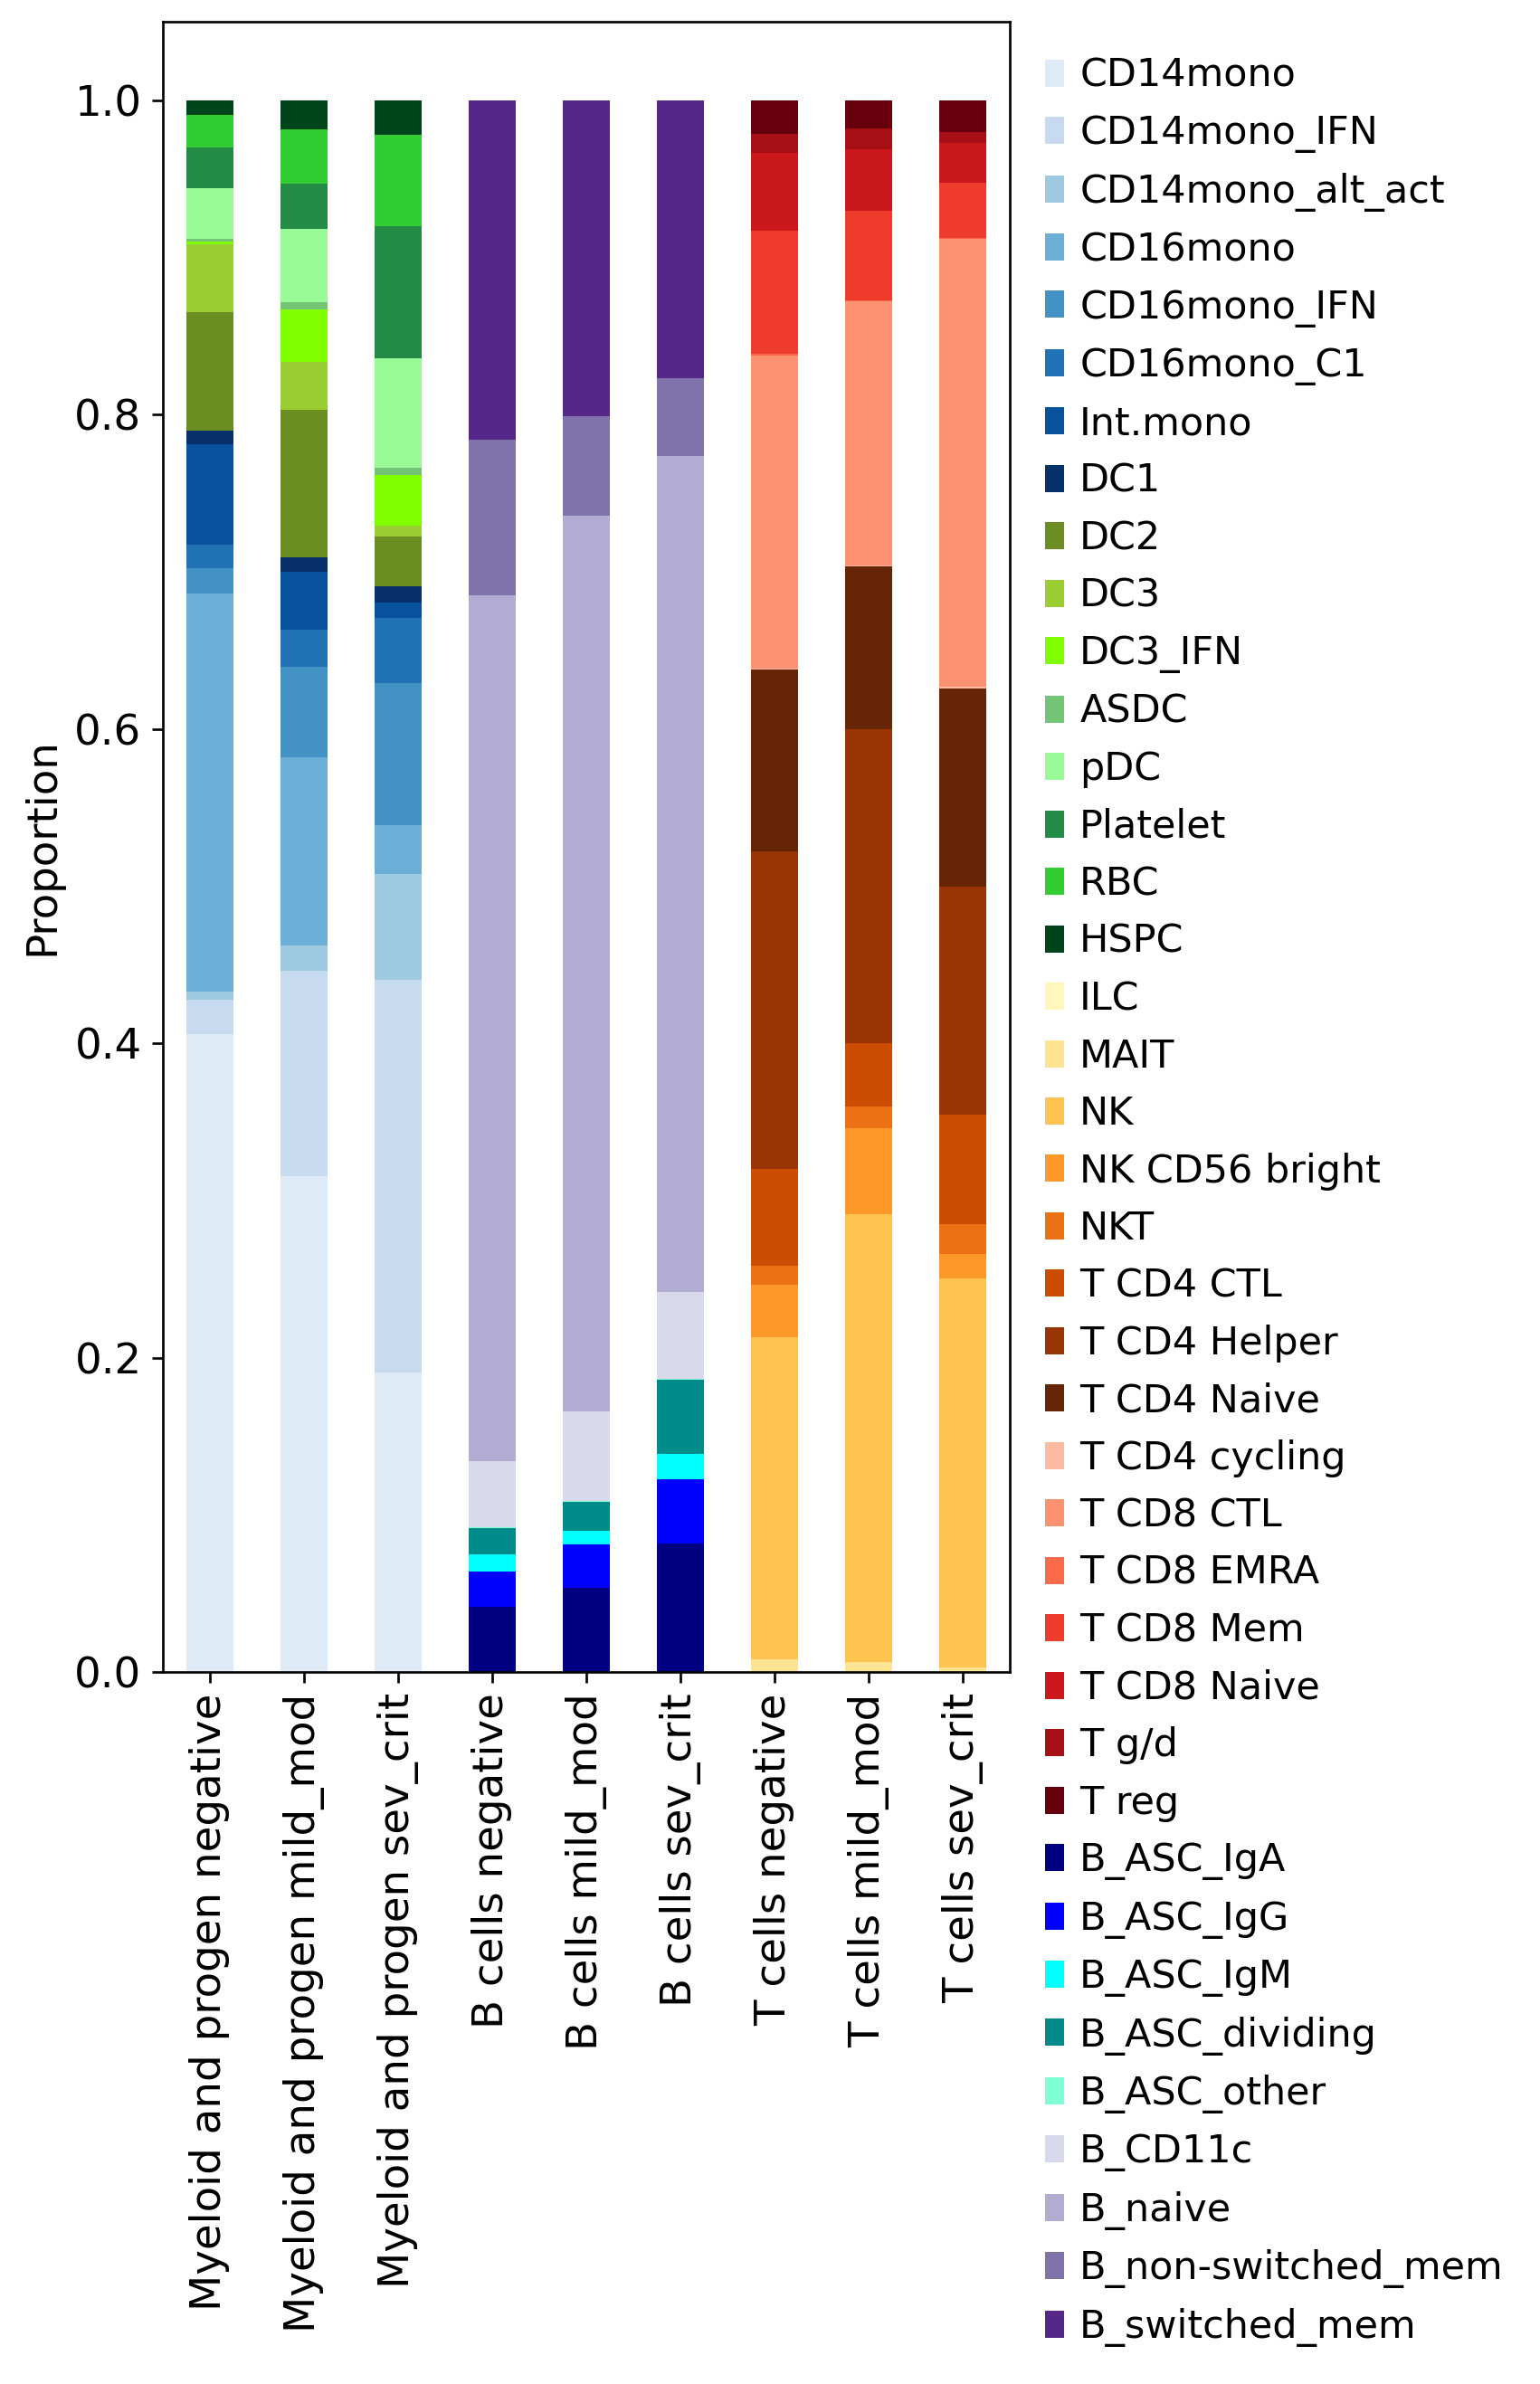

In [68]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
mycolor = ['#DEEBF7','#C6DBEF','#9ECAE1','#6BAED6','#4292C6','#2171B5','#08519C','#08306B',
           'olivedrab','yellowgreen','chartreuse','#74C476','palegreen','#238B45','limegreen','#00441B',
           
           '#FFF7BC','#FEE391','#FEC44F','#FE9929','#EC7014','#CC4C02','#993404','#662506',
           '#FCBBA1','#FC9272','#FB6A4A','#EF3B2C','#CB181D','#A50F15','#67000D',
           
           'navy','blue','cyan','darkcyan','aquamarine','#D8DAEB','#B2ABD2','#8073AC','#542788']
res1.plot.bar(stacked = True,color=mycolor,figsize=(5,10))
#plt.legend(bbox_to_anchor = (1,1), frameon = False)
lgd =plt.legend(bbox_to_anchor = (1,1), frameon = False)
plt.grid(False)
plt.ylabel('Proportion')
plt.savefig('all_compartment_sev.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [69]:
pval1=[]
from scipy.stats import ranksums
for i in range (0, len(df_M_negative.columns)):
    print(df_M_negative.columns[i])
    print (df_M_mild_mod.columns[i])
    print(ranksums(df_M_negative[df_M_negative.columns[i]], df_M_mild_mod[df_M_mild_mod.columns[i]]))
    p = ranksums(df_M_negative[df_M_negative.columns[i]], df_M_mild_mod[df_M_mild_mod.columns[i]])
    pval1.append(p[1])

ASDC
ASDC
RanksumsResult(statistic=-1.6426803197289672, pvalue=0.1004490927349175)
CD14mono
CD14mono
RanksumsResult(statistic=1.9999070330946844, pvalue=0.045510303575816397)
CD14mono_IFN
CD14mono_IFN
RanksumsResult(statistic=-3.8001046437565664, pvalue=0.00014463499915093748)
CD14mono_alt_act
CD14mono_alt_act
RanksumsResult(statistic=-1.1335619329636537, pvalue=0.2569783485129651)
CD16mono
CD16mono
RanksumsResult(statistic=4.739582771820736, pvalue=2.141587391269683e-06)
CD16mono_C1
CD16mono_C1
RanksumsResult(statistic=-0.3516010958323988, pvalue=0.7251374432639071)
CD16mono_IFN
CD16mono_IFN
RanksumsResult(statistic=-1.9577149015947966, pvalue=0.05026347568737009)
DC1
DC1
RanksumsResult(statistic=0.07875864546645733, pvalue=0.9372245979614631)
DC2
DC2
RanksumsResult(statistic=-0.061881792866502194, pvalue=0.9506569668939221)
DC3
DC3
RanksumsResult(statistic=2.677793945859549, pvalue=0.007410879366688917)
DC3_IFN
DC3_IFN
RanksumsResult(statistic=-3.603208030090423, pvalue=0.00031431377

In [70]:
pval2=[]
for i in range (0, len(df_M_negative.columns)):
    print(df_M_negative.columns[i])
    print (df_M_sev_critical.columns[i])
    print(ranksums(df_M_negative[df_M_negative.columns[i]], df_M_sev_critical[df_M_sev_critical.columns[i]]))
    p = ranksums(df_M_negative[df_M_negative.columns[i]], df_M_sev_critical[df_M_sev_critical.columns[i]])
    pval2.append(p[1])

ASDC
ASDC
RanksumsResult(statistic=0.4042397807958607, pvalue=0.6860364032612414)
CD14mono
CD14mono
RanksumsResult(statistic=4.540829382337969, pvalue=5.603336403066958e-06)
CD14mono_IFN
CD14mono_IFN
RanksumsResult(statistic=-6.381494015282228, pvalue=1.7536857704006445e-10)
CD14mono_alt_act
CD14mono_alt_act
RanksumsResult(statistic=-2.8532264139669, pvalue=0.004327777481544264)
CD16mono
CD16mono
RanksumsResult(statistic=7.2331448155997204, pvalue=4.719356788219846e-13)
CD16mono_C1
CD16mono_C1
RanksumsResult(statistic=-3.3359593560823453, pvalue=0.0008500559047977866)
CD16mono_IFN
CD16mono_IFN
RanksumsResult(statistic=-2.9277949172205058, pvalue=0.0034137513529629185)
DC1
DC1
RanksumsResult(statistic=2.6491441945359804, pvalue=0.008069589346939172)
DC2
DC2
RanksumsResult(statistic=4.858726685682287, pvalue=1.18143089694516e-06)
DC3
DC3
RanksumsResult(statistic=7.009439305838905, pvalue=2.392750603618752e-12)
DC3_IFN
DC3_IFN
RanksumsResult(statistic=-5.121678776102895, pvalue=3.02827443

In [71]:
pval3=[]
for i in range (0, len(df_M_mild_mod.columns)):
    print(df_M_mild_mod.columns[i])
    print (df_M_sev_critical.columns[i])
    print(ranksums(df_M_mild_mod[df_M_mild_mod.columns[i]], df_M_sev_critical[df_M_sev_critical.columns[i]]))
    p = ranksums(df_M_mild_mod[df_M_mild_mod.columns[i]], df_M_sev_critical[df_M_sev_critical.columns[i]])
    pval3.append(p[1])

ASDC
ASDC
RanksumsResult(statistic=1.8609104192981678, pvalue=0.06275682813847208)
CD14mono
CD14mono
RanksumsResult(statistic=3.262441809375302, pvalue=0.001104568474130699)
CD14mono_IFN
CD14mono_IFN
RanksumsResult(statistic=-3.972777900855974, pvalue=7.103928123081077e-05)
CD14mono_alt_act
CD14mono_alt_act
RanksumsResult(statistic=-2.575500020308664, pvalue=0.010009526741514051)
CD16mono
CD16mono
RanksumsResult(statistic=4.351340249010344, pvalue=1.3530788872820354e-05)
CD16mono_C1
CD16mono_C1
RanksumsResult(statistic=-2.94980885893321, pvalue=0.003179705788829684)
CD16mono_IFN
CD16mono_IFN
RanksumsResult(statistic=-1.6503616975718607, pvalue=0.09886898018977201)
DC1
DC1
RanksumsResult(statistic=2.5840070393683128, pvalue=0.009765980108452465)
DC2
DC2
RanksumsResult(statistic=5.729477336673444, pvalue=1.0074054686802585e-08)
DC3
DC3
RanksumsResult(statistic=6.099532665768166, pvalue=1.0637901986926013e-09)
DC3_IFN
DC3_IFN
RanksumsResult(statistic=-1.5291366759718659, pvalue=0.12623056

In [72]:
pval4=[]
for i in range (0, len(df_T_negative.columns)):
    print(df_T_negative.columns[i])
    print (df_T_mild_mod.columns[i])
    print(ranksums(df_T_negative[df_T_negative.columns[i]], df_T_mild_mod[df_T_mild_mod.columns[i]]))
    p =ranksums(df_T_negative[df_T_negative.columns[i]], df_T_mild_mod[df_T_mild_mod.columns[i]])
    pval4.append(p[1])

ILC
ILC
RanksumsResult(statistic=0.9745904558415068, pvalue=0.32976344975937155)
MAIT
MAIT
RanksumsResult(statistic=1.8951948514468953, pvalue=0.05806659200694986)
NK
NK
RanksumsResult(statistic=-1.6622023809541735, pvalue=0.09647220280171617)
NK CD56 bright
NK CD56 bright
RanksumsResult(statistic=-2.077042633294873, pvalue=0.03779762451772078)
NKT
NKT
RanksumsResult(statistic=-0.42336436711482367, pvalue=0.6720294385086769)
T CD4 CTL
T CD4 CTL
RanksumsResult(statistic=1.9719118844140109, pvalue=0.04861966637561997)
T CD4 Helper
T CD4 Helper
RanksumsResult(statistic=0.9916386853897547, pvalue=0.32137381092997397)
T CD4 Naive
T CD4 Naive
RanksumsResult(statistic=1.6508368945886749, pvalue=0.09877188429114536)
T CD4 cycling
T CD4 cycling
RanksumsResult(statistic=-0.21878561253584847, pvalue=0.8268170549077386)
T CD8 CTL
T CD8 CTL
RanksumsResult(statistic=1.321237789989215, pvalue=0.18642208952445094)
T CD8 EMRA
T CD8 EMRA
RanksumsResult(statistic=-0.4034747659752011, pvalue=0.68659899459

In [73]:
pval5=[]
for i in range (0, len(df_T_negative.columns)):
    print(df_T_negative.columns[i])
    print (df_T_sev_critical.columns[i])
    print(ranksums(df_T_negative[df_T_negative.columns[i]], df_T_sev_critical[df_T_sev_critical.columns[i]]))
    p = ranksums(df_T_negative[df_T_negative.columns[i]], df_T_sev_critical[df_T_sev_critical.columns[i]])
    pval5.append(p[1])

ILC
ILC
RanksumsResult(statistic=2.080068774968992, pvalue=0.03751922513286127)
MAIT
MAIT
RanksumsResult(statistic=4.513356775876114, pvalue=6.3809546133351e-06)
NK
NK
RanksumsResult(statistic=-0.5886987098968844, pvalue=0.55606340348895)
NK CD56 bright
NK CD56 bright
RanksumsResult(statistic=2.064370142705075, pvalue=0.038982635121795665)
NKT
NKT
RanksumsResult(statistic=-2.3430208653896, pvalue=0.0191283133177108)
T CD4 CTL
T CD4 CTL
RanksumsResult(statistic=-0.3846164904659645, pvalue=0.7005215746697233)
T CD4 Helper
T CD4 Helper
RanksumsResult(statistic=2.9434935494844225, pvalue=0.0032453058606393146)
T CD4 Naive
T CD4 Naive
RanksumsResult(statistic=1.758246813558695, pvalue=0.07870552303890561)
T CD4 cycling
T CD4 cycling
RanksumsResult(statistic=0.01569863226391692, pvalue=0.9874748181587082)
T CD8 CTL
T CD8 CTL
RanksumsResult(statistic=-1.6169591231834428, pvalue=0.10588710477705196)
T CD8 EMRA
T CD8 EMRA
RanksumsResult(statistic=-0.18053427103504457, pvalue=0.8567331519823013)

In [74]:
pval6=[]
for i in range (0, len(df_T_mild_mod.columns)):
    print(df_T_mild_mod.columns[i])
    print (df_T_sev_critical.columns[i])
    print(ranksums(df_T_mild_mod[df_T_mild_mod.columns[i]], df_T_sev_critical[df_T_sev_critical.columns[i]]))
    p = ranksums(df_T_mild_mod[df_T_mild_mod.columns[i]], df_T_sev_critical[df_T_sev_critical.columns[i]])
    pval6.append(p[1])

ILC
ILC
RanksumsResult(statistic=1.3484138155802547, pvalue=0.1775253228740844)
MAIT
MAIT
RanksumsResult(statistic=3.1262587826191894, pvalue=0.0017704568140635769)
NK
NK
RanksumsResult(statistic=0.9554843119955627, pvalue=0.33933283511008916)
NK CD56 bright
NK CD56 bright
RanksumsResult(statistic=4.7452142236184125, pvalue=2.0828578344401773e-06)
NKT
NKT
RanksumsResult(statistic=-2.559409662693732, pvalue=0.010485010275036094)
T CD4 CTL
T CD4 CTL
RanksumsResult(statistic=-2.5937641548104264, pvalue=0.009493158253551482)
T CD4 Helper
T CD4 Helper
RanksumsResult(statistic=2.0397979694287294, pvalue=0.041370452159543894)
T CD4 Naive
T CD4 Naive
RanksumsResult(statistic=0.9662200907820296, pvalue=0.3339340617219575)
T CD4 cycling
T CD4 cycling
RanksumsResult(statistic=0.16103668179700495, pvalue=0.8720645097649659)
T CD8 CTL
T CD8 CTL
RanksumsResult(statistic=-3.1219644711046026, pvalue=0.0017964861751165553)
T CD8 EMRA
T CD8 EMRA
RanksumsResult(statistic=0.18465539512723234, pvalue=0.853

In [75]:
pval7=[]
for i in range (0, len(df_B_negative.columns)):
    print(df_B_negative.columns[i])
    print (df_B_mild_mod.columns[i])
    print(ranksums(df_B_negative[df_B_negative.columns[i]], df_B_mild_mod[df_B_mild_mod.columns[i]]))
    p = ranksums(df_B_negative[df_B_negative.columns[i]], df_B_mild_mod[df_B_mild_mod.columns[i]])
    pval7.append(p[1])

B_ASC_IgA
B_ASC_IgA
RanksumsResult(statistic=-0.5654329466835565, pvalue=0.5717793203075341)
B_ASC_IgG
B_ASC_IgG
RanksumsResult(statistic=-1.3382860195374628, pvalue=0.18080321743049177)
B_ASC_IgM
B_ASC_IgM
RanksumsResult(statistic=-0.6591982091989201, pvalue=0.509768496744396)
B_ASC_dividing
B_ASC_dividing
RanksumsResult(statistic=-0.6393086080592975, pvalue=0.5226221896715928)
B_ASC_other
B_ASC_other
RanksumsResult(statistic=-0.04546194546199449, pvalue=0.963739106641313)
B_CD11c
B_CD11c
RanksumsResult(statistic=-1.5627543752560606, pvalue=0.11811037934934616)
B_naive
B_naive
RanksumsResult(statistic=-0.6052121489628016, pvalue=0.5450380445237987)
B_non-switched_mem
B_non-switched_mem
RanksumsResult(statistic=3.0033297720830108, pvalue=0.0026704289503186717)
B_switched_mem
B_switched_mem
RanksumsResult(statistic=0.9547008547018843, pvalue=0.3397289975293938)


In [76]:
pval8=[]
for i in range (0, len(df_B_negative.columns)):
    print(df_B_negative.columns[i])
    print (df_B_sev_critical.columns[i])
    print(ranksums(df_B_negative[df_B_negative.columns[i]], df_B_sev_critical[df_B_sev_critical.columns[i]]))
    p =ranksums(df_B_negative[df_B_negative.columns[i]], df_B_sev_critical[df_B_sev_critical.columns[i]])
    pval8.append(p[1])

B_ASC_IgA
B_ASC_IgA
RanksumsResult(statistic=-1.6248084393154012, pvalue=0.104203382270903)
B_ASC_IgG
B_ASC_IgG
RanksumsResult(statistic=-2.0879180911009505, pvalue=0.03680522396003215)
B_ASC_IgM
B_ASC_IgM
RanksumsResult(statistic=-1.7621714716246744, pvalue=0.07804033059329542)
B_ASC_dividing
B_ASC_dividing
RanksumsResult(statistic=-3.0573086333978203, pvalue=0.0022333419375079842)
B_ASC_other
B_ASC_other
RanksumsResult(statistic=-0.3021986710804007, pvalue=0.7625006172368056)
B_CD11c
B_CD11c
RanksumsResult(statistic=-1.5855618586556088, pvalue=0.11283873416640011)
B_naive
B_naive
RanksumsResult(statistic=0.13736303230927305, pvalue=0.8907438499581061)
B_non-switched_mem
B_non-switched_mem
RanksumsResult(statistic=3.602836104568933, pvalue=0.0003147640076400492)
B_switched_mem
B_switched_mem
RanksumsResult(statistic=1.6836783103050896, pvalue=0.0922438552978454)


In [77]:
pval9=[]
for i in range (0, len(df_B_mild_mod.columns)):
    print(df_B_mild_mod.columns[i])
    print (df_B_sev_critical.columns[i])
    print(ranksums(df_B_mild_mod[df_B_mild_mod.columns[i]], df_B_sev_critical[df_B_sev_critical.columns[i]]))
    p = ranksums(df_B_mild_mod[df_B_mild_mod.columns[i]], df_B_sev_critical[df_B_sev_critical.columns[i]])
    pval9.append(p[1])

B_ASC_IgA
B_ASC_IgA
RanksumsResult(statistic=-1.311912167706267, pvalue=0.18954977155035524)
B_ASC_IgG
B_ASC_IgG
RanksumsResult(statistic=-1.2775576755895726, pvalue=0.20140543201489414)
B_ASC_IgM
B_ASC_IgM
RanksumsResult(statistic=-1.6661928676596778, pvalue=0.09567500610968063)
B_ASC_dividing
B_ASC_dividing
RanksumsResult(statistic=-2.9866936583951182, pvalue=0.002820121586598076)
B_ASC_other
B_ASC_other
RanksumsResult(statistic=-0.3156318963221297, pvalue=0.7522819246103203)
B_CD11c
B_CD11c
RanksumsResult(statistic=-0.19109686239911253, pvalue=0.8484497057844992)
B_naive
B_naive
RanksumsResult(statistic=0.8180663435287852, pvalue=0.4133193056663659)
B_non-switched_mem
B_non-switched_mem
RanksumsResult(statistic=1.2882934543760396, pvalue=0.1976438308002828)
B_switched_mem
B_switched_mem
RanksumsResult(statistic=0.8051834089850247, pvalue=0.4207138490635156)


In [78]:
toprint=list(df_M_mild_mod.columns)+list(df_M_mild_mod.columns)+list(df_M_mild_mod.columns)+\
        list(df_T_mild_mod.columns)+list(df_T_mild_mod.columns)+list(df_T_mild_mod.columns)+\
        list(df_B_mild_mod.columns)+list(df_B_mild_mod.columns)+list(df_B_mild_mod.columns)

In [79]:
len(toprint)

120

In [80]:
#fdr
from rpy2.robjects.packages import importr
from rpy2.robjects.vectors import FloatVector

stats = importr('stats')
pvalue_list=pval1+ pval2 +pval3 +pval4 +pval5+pval6 +pval7+ pval8 +pval9
p_adjust = stats.p_adjust(FloatVector(pvalue_list), method = 'fdr')
len(p_adjust)
for i in range (0,len(toprint)):
    print(toprint[i])
    print(p_adjust[i])
    print('_______')
print(len(p_adjust))

ASDC
0.18834204887797032
_______
CD14mono
0.10502377748265321
_______
CD14mono_IFN
0.0008678099949056249
_______
CD14mono_alt_act
0.3760658758726318
_______
CD16mono
1.835646335374014e-05
_______
CD16mono_C1
0.8209103131289514
_______
CD16mono_IFN
0.11169661263860022
_______
DC1
0.9667697968412766
_______
DC2
0.9667697968412766
_______
DC3
0.023402776947438683
_______
DC3_IFN
0.001716894587127541
_______
HSPC
0.5105227479608251
_______
Int.mono
3.537417436521145e-05
_______
Platelet
0.6391782457273557
_______
RBC
0.3269178886023567
_______
pDC
0.0637389637377493
_______
ASDC
0.7922296091437535
_______
CD14mono
4.2025023023002184e-05
_______
CD14mono_IFN
5.261057311201934e-09
_______
CD14mono_alt_act
0.014425924938480881
_______
CD16mono
2.8316140729319078e-11
_______
CD16mono_C1
0.004250279523988933
_______
CD16mono_IFN
0.01170429035301572
_______
DC1
0.02482950568288976
_______
DC2
1.1814308969451602e-05
_______
DC3
9.571002414475008e-11
_______
DC3_IFN
3.633929317932812e-06
_______
H